# Edamame classification module

In [1]:
import edamame
import edamame.eda as eda
from edamame.classifier import TrainClassifier, classifier_metrics, ClassifierDiagnose
import pandas as pd
import numpy as np
from sklearn import datasets
print(edamame.__version__)

0.59


### Upload dataset

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(150, 4)
<class 'numpy.ndarray'>
(150,)
<class 'numpy.ndarray'>


In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = pd.DataFrame(X, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y = pd.Series(y)
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [6]:
X_train, y_train, X_test, y_test = eda.setup(X,y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [7]:
X_train_s = eda.scaling(X_train)
X_test_s = eda.scaling(X_test)
print(X_train_s.shape)
print(X_train_s.head())
print(X_test_s.shape)
print(X_test_s.head())

(112, 4)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
4            -1.018271          1.286460          -1.393389         -1.362177
32           -0.773010          2.435452          -1.335503         -1.496476
142          -0.037227         -0.781725           0.748378          0.920908
85            0.208034          0.826864           0.401064          0.518011
86            1.066448          0.137469           0.516836          0.383712
(38, 4)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
73            0.256211         -0.719037           0.589872          0.055859
18           -0.212994          1.616298          -1.038346         -1.067895
118           2.133031         -1.186104           1.783898          1.429337
78            0.138909         -0.485504           0.481324          0.430444
76            1.077320         -0.719037           0.644146          0.305582


## Classification models

In [8]:
classifier = TrainClassifier(X_train_s, y_train, X_test_s, y_test)
svm = classifier.svm()
rf = classifier.random_forest()
xgb = classifier.xgboost()
nb = classifier.gaussian_nb()

### gaussian_nb model metrics:

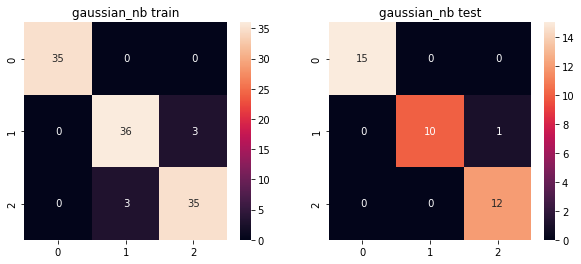

#### Train classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.92      0.92      0.92        39
           2       0.92      0.92      0.92        38

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



#### Test classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [9]:
classifier.model_metrics(model_name="gaussian_nb", cm=True)

In [10]:
classifier.save_model(model_name="gaussian_nb")

In [11]:
nb_upload = eda.load_model(path='gaussian_nb.pkl')

#### Model metrics:

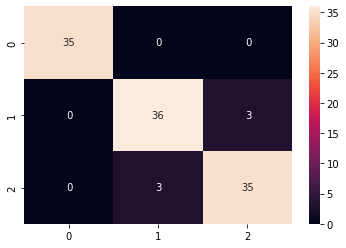

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.92      0.92      0.92        39
           2       0.92      0.92      0.92        38

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



In [12]:
classifier_metrics(nb_upload, X=X_train_s, y=y_train, cm=True)

## Diagnose

In [13]:
classifier_diagnose = ClassifierDiagnose(X_train=X_train_s, y_train=y_train, X_test=X_test_s, y_test=y_test)

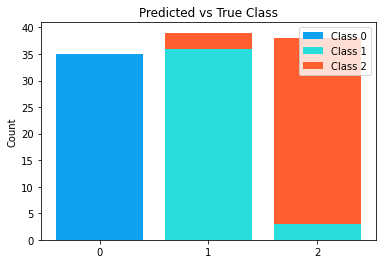

In [34]:
classifier_diagnose.class_prediction_error(model=nb, figsize=(6,4))

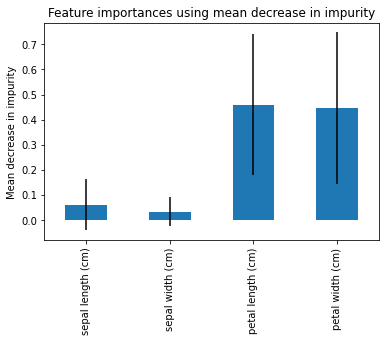

In [20]:
classifier_diagnose.random_forest_fi(model=rf, figsize=(6,4))

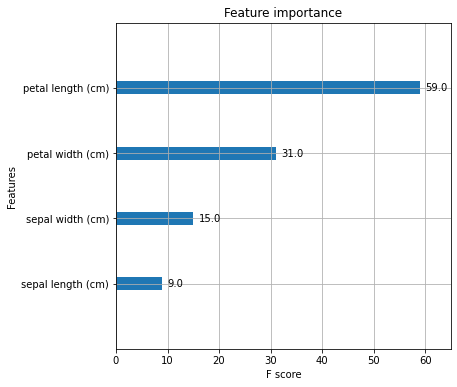

In [30]:
classifier_diagnose.xgboost_fi(model=xgb, figsize=(6,4))

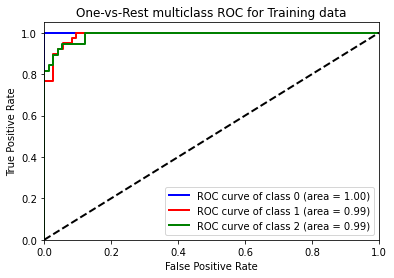

In [22]:
classifier_diagnose.plot_roc_auc(model=nb, figsize=(6,4))